In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Principal Components Analysis

In [2]:
usarrests = pd.read_csv('./Downloads/USArrests.csv', index_col=0)
usarrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [3]:
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
usarrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
usarrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [6]:
usarrests_scale = pd.DataFrame(
    scale(usarrests), index=usarrests.index, columns=usarrests.columns)
usarrests_scale.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [7]:
pca = PCA()
pca.fit(usarrests_scale)

PCA()

In [8]:
pcl = pd.DataFrame(pca.components_.T, index=usarrests_scale.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pcl

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [9]:
usarrests_scale_reduced = pca.fit_transform(usarrests_scale)
pc = pd.DataFrame(usarrests_scale_reduced, index=usarrests.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


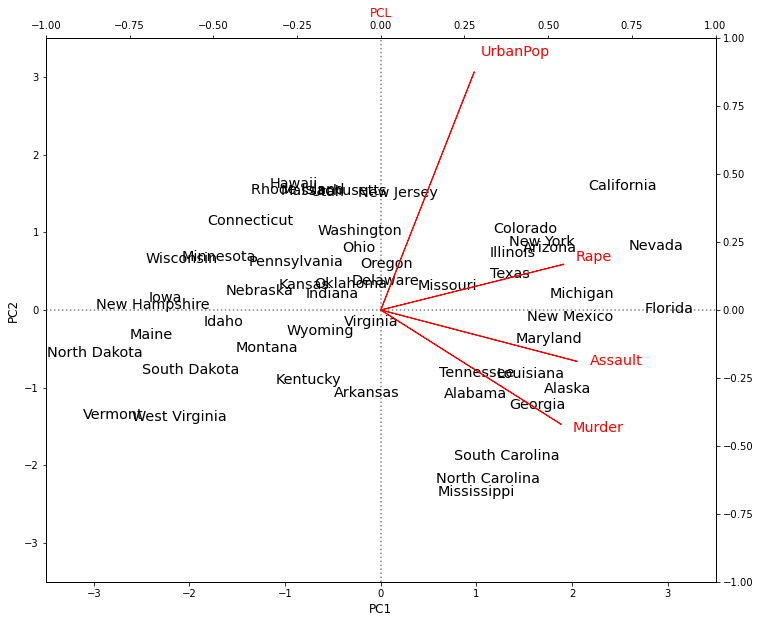

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 10))

ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)

for i in pc.index:
    ax1.annotate(i, (pc['PC1'][i], -pc['PC2'][i]),
                 ha='center', fontsize='x-large')

ax1.hlines(0, -3.5, 3.5, linestyle='dotted', colors='grey')
ax1.vlines(0, -3.5, 3.5, linestyle='dotted', colors='grey')

ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)

ax2 = ax1.twinx().twiny()

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('PCL', color='red', fontsize=12)

a = 1.07
for i in pcl.index:
    ax2.annotate(i, (pcl['PC1'][i]*a, -pcl['PC2'][i]*a),
                 color='red', fontsize='x-large')

ax2.arrow(0, 0, pcl['PC1'][0], -pcl['PC2'][0], color='red')
ax2.arrow(0, 0, pcl['PC1'][1], -pcl['PC2'][1], color='red')
ax2.arrow(0, 0, pcl['PC1'][2], -pcl['PC2'][2], color='red')
ax2.arrow(0, 0, pcl['PC1'][3], -pcl['PC2'][3], color='red')

plt.show()

In [11]:
pc.describe()

,PC1,PC2,PC3,PC4
count,5.000000e+01,50.000000,5.000000e+01,5.000000e+01
mean,-9.769963e-17,0.000000,-4.829470e-17,-1.165734e-17
std,1.590867e+00,1.004970,6.031915e-01,4.206774e-01
min,-2.992226e+00,-1.570460,-1.369946e+00,-9.543817e-01
25%,-1.117253e+00,-0.727139,-4.333588e-01,-2.113386e-01
50%,-1.791618e-01,-0.153480,3.120435e-02,-6.009741e-03
75%,1.372968e+00,0.767287,2.565733e-01,2.144737e-01
max,3.013042e+00,2.393796,2.040003e+00,1.076797e+00


In [12]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [13]:
pve = pca.explained_variance_ratio_
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

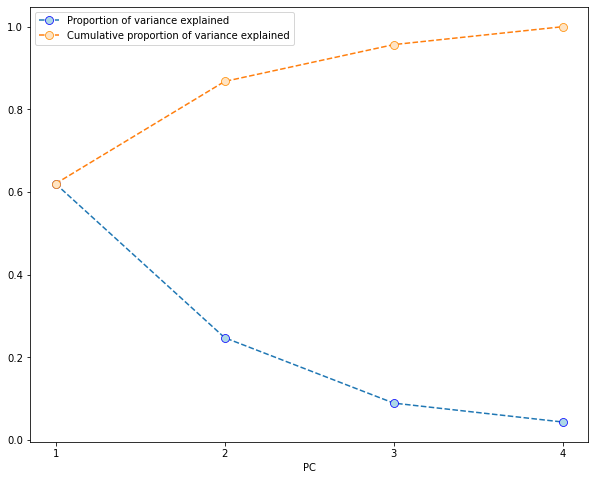

In [14]:
plt.figure(figsize=(10, 8))

sns.lineplot(x=range(1, 5), y=pve, markerfacecolor='lightblue', markeredgecolor='blue',
             marker='o', ls='--', markersize=8, label='Proportion of variance explained')
sns.lineplot(x=range(1, 5), y=np.cumsum(pve), markerfacecolor='bisque', markeredgecolor='darkorange',
             marker='o', ls='--', markersize=8, label='Cumulative proportion of variance explained')

plt.xlabel('PC')
plt.xticks(range(1, 5))

plt.show()

# K-Means Clustering

In [15]:
np.random.seed(1)

x = np.random.normal(size=(50, 2))
x[:25, 0] += 3
x[:25, 1] -= 4

In [18]:
km2_20 = KMeans(n_clusters=2, n_init=20)
km2_20.fit(x)

KMeans(n_clusters=2, n_init=20)

In [19]:
km2_20.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
km3_20 = KMeans(n_clusters=3, n_init=20)
km3_20.fit(x)

KMeans(n_clusters=3, n_init=20)

In [21]:
km3_1 = KMeans(n_clusters=3, n_init=1)
km3_1.fit(x)

KMeans(n_clusters=3, n_init=1)

In [22]:
def plot_kmeans(km, ax, title):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], s=60, hue=km.labels_, ax=ax)
    sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[
                    :, 1], s=300, marker='+', ax=ax, color='black')
    ax.set_title(title)

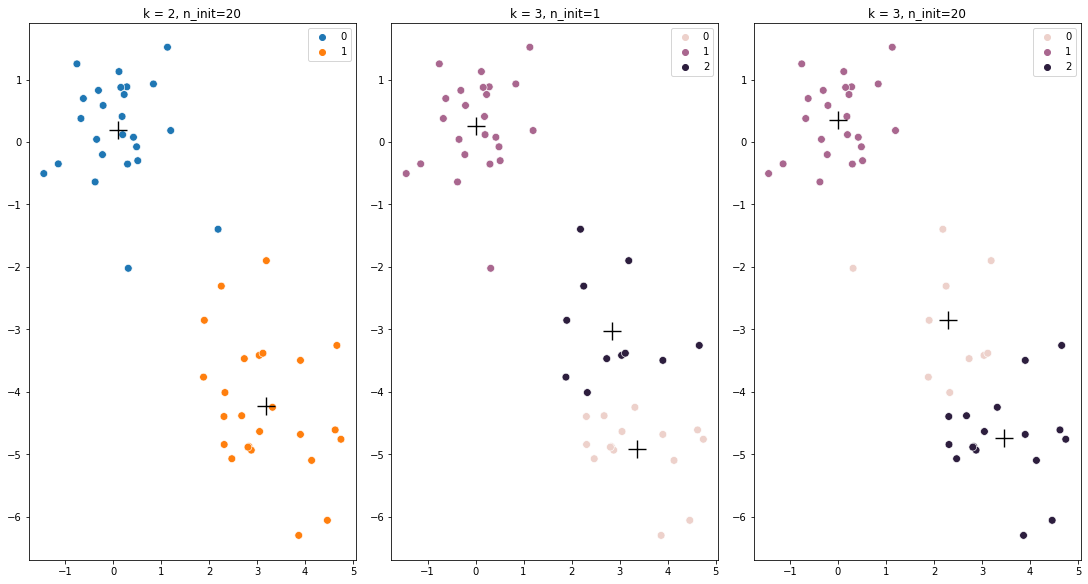

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8), constrained_layout=True)

plot_kmeans(km2_20, axes[0], 'k = 2, n_init=20')
plot_kmeans(km3_1, axes[1], 'k = 3, n_init=1')
plot_kmeans(km3_20, axes[2], 'k = 3, n_init=20')

plt.show()

In [24]:
km2_20.inertia_, km3_1.inertia_, km3_20.inertia_

(75.47163580431754, 52.390055152566184, 52.269903934169875)

# Hierarchical Clustering

In [27]:
hc_complete = linkage(x, method='complete')
hc_average = linkage(x, method='average')
hc_single = linkage(x)

In [28]:
def plot_dend(hc, ax, title):
    dendrogram(hc, ax=ax, leaf_font_size=12)
    ax.set_title(title, fontsize=12)

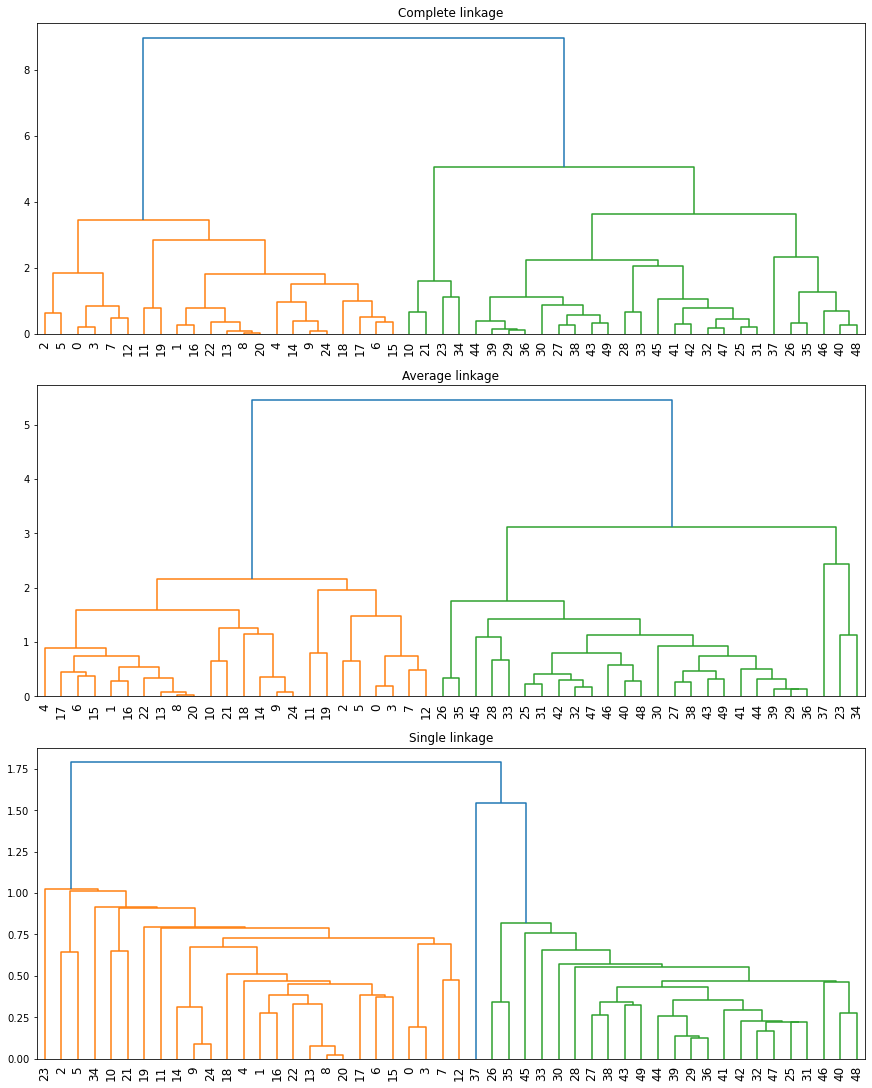

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)

plot_dend(hc_complete, axes[0], 'Complete linkage')
plot_dend(hc_average, axes[1], 'Average linkage')
plot_dend(hc_single, axes[2], 'Single linkage')

plt.show()

In [30]:
cut_tree(hc_complete, 2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [31]:
cut_tree(hc_average, 2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

In [32]:
cut_tree(hc_single, 2).T

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]])

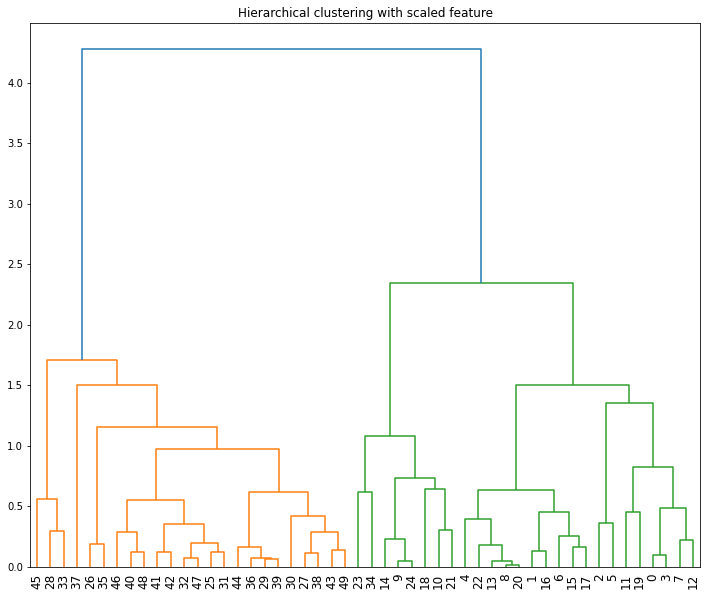

In [33]:
plt.figure(figsize=(12, 10))

dendrogram(linkage(scale(x), method='complete'), leaf_font_size=12)

plt.title('Hierarchical clustering with scaled feature', fontsize=12)

plt.show()

In [34]:
np.random.seed(2)

x = np.random.normal(size=(30, 3))
dd = 1-np.corrcoef(x)

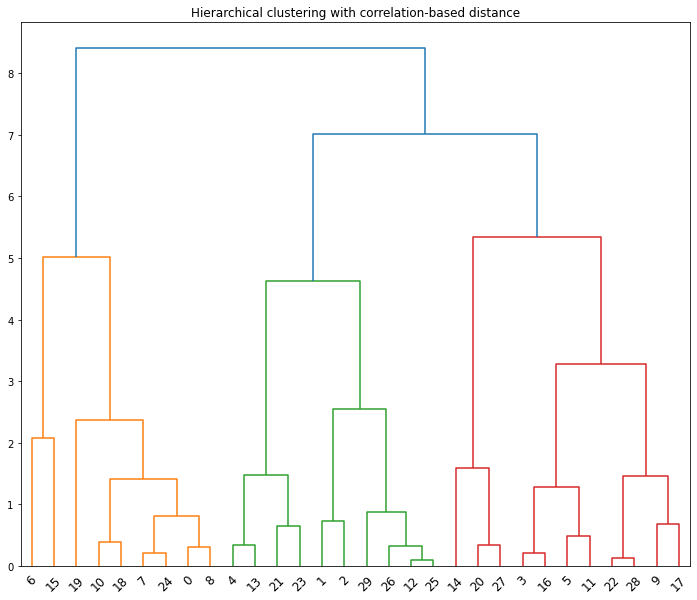

In [37]:
plt.figure(figsize=(12, 10))

dendrogram(linkage(dd, method='complete'), leaf_font_size=12)

plt.title('Hierarchical clustering with correlation-based distance', fontsize=12)

plt.show()

# PCA on the NCI60 Data

In [38]:
nci_data = pd.read_csv('./Downloads/NCI_Data.csv', index_col=0)
nci_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [39]:
nci_data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [40]:
nci_labs = pd.read_csv('./Downloads/NCI_Labs.csv', index_col=0)
nci_labs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       64 non-null     object
dtypes: object(1)
memory usage: 1.0+ KB


In [41]:
nci_labs.head()

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [42]:
pca = PCA()
pc = pd.DataFrame(pca.fit_transform(scale(nci_data)), index=nci_data.index)
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
V1,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
V2,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
V3,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
V4,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
V5,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14


In [43]:
nci_labs.index = ['V'+str(i) for i in range(1, 65)]

In [44]:
def plot_pca(pc, col, ax, ylabel):
    sns.scatterplot(x=pc.iloc[:, 0], y=-pc.iloc[:, col], hue=nci_labs.squeeze(), ax=ax, s=100, alpha=.5, palette='Set1')
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(bbox_to_anchor=(1.05, 1))

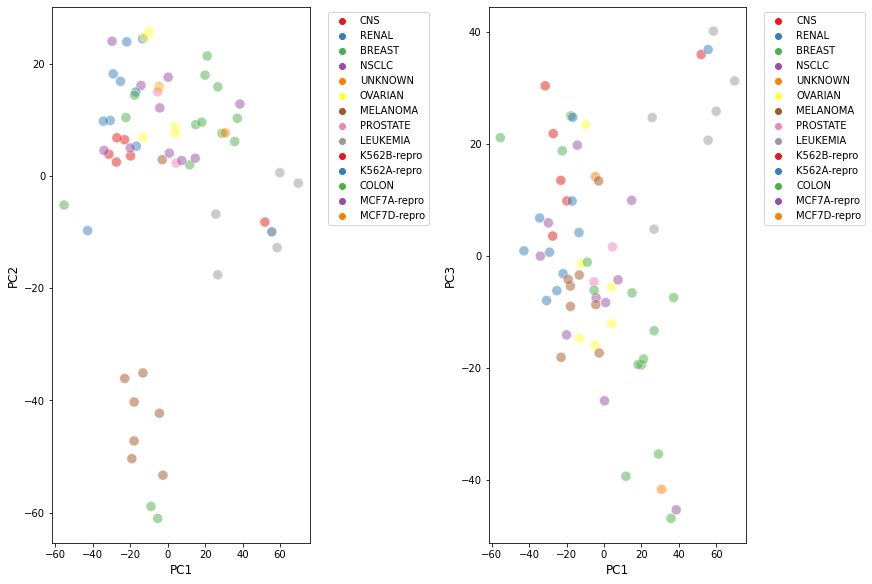

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8), constrained_layout=True)

plot_pca(pc, 1, axes[0], 'PC2')
plot_pca(pc, 2, axes[1], 'PC3')

for ax in axes:
    ax.set_xlabel('PC1', fontsize=12)
    
plt.show()

In [46]:
df = pd.DataFrame([pc.std(), pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)], index=[
                  'Standart deviation', 'Proportion of Variance', 'Cumulative Proportion'])
df.columns = ['PC'+str(i) for i in range(1, 65)]
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Standart deviation,28.073658,21.651171,19.977151,17.167203,16.098068,15.845362,14.585855,13.651338,13.247906,12.839298,...,5.959071,5.780726,5.515873,5.333984,5.060868,4.721007,4.208683,4.114391,4.073190,1.573208e-29
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350,0.036186,0.030662,0.026859,0.025295,0.023759,...,0.005118,0.004816,0.004385,0.004101,0.003691,0.003212,0.002553,0.002440,0.002391,2.240156e-32
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495,0.354681,0.385344,0.412203,0.437498,0.461256,...,0.972411,0.977227,0.981612,0.985713,0.989404,0.992616,0.995169,0.997609,1.000000,1.000000e+00


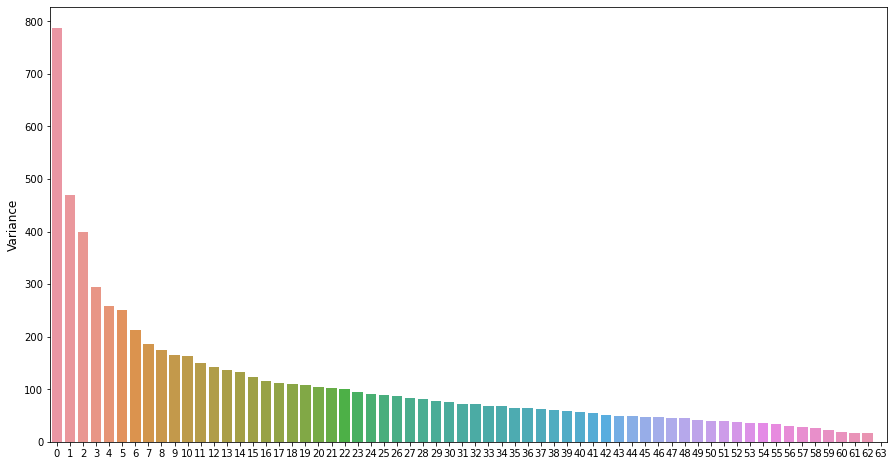

In [47]:
plt.figure(figsize=(15, 8))

var = pc.var()

sns.barplot(x=var.index, y=var)

plt.ylabel('Variance', fontsize=12)

plt.show()

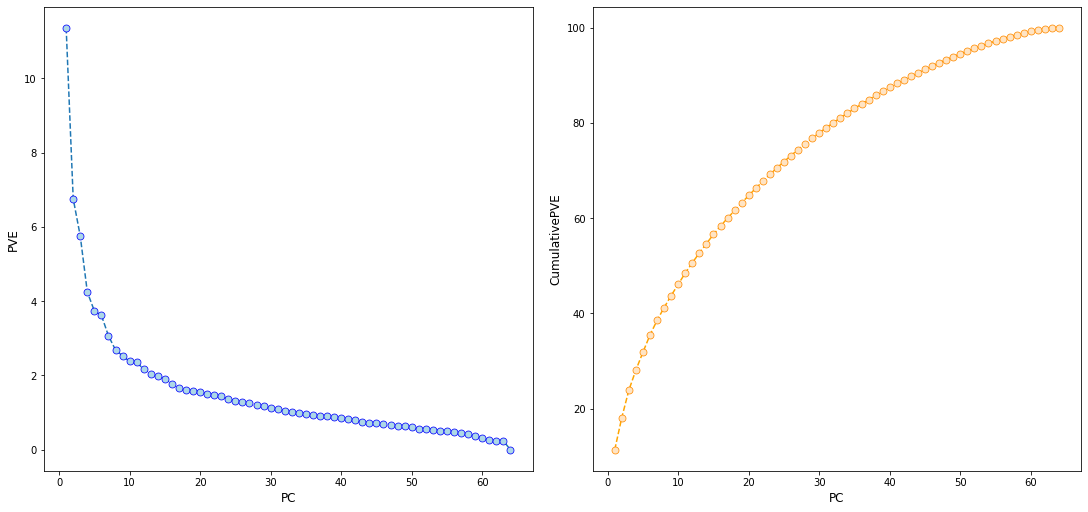

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)

pve = pca.explained_variance_ratio_*100

sns.lineplot(x=range(1, 65), y=pve, marker='o', markerfacecolor='lightblue',
             markeredgecolor='blue', ax=axes[0], markersize=7, ls='--')
axes[0].set_ylabel('PVE', fontsize=12)

sns.lineplot(x=range(1, 65), y=np.cumsum(pve), marker='o', markerfacecolor='bisque',
             markeredgecolor='darkorange', ax=axes[1], markersize=7, ls='--', color='orange')
axes[1].set_ylabel('CumulativePVE', fontsize=12)

for ax in axes:
    ax.set_xlabel('PC', fontsize=12)
    
plt.show()

# Clustering the Observations of the NCI60 Data

In [49]:
pca = PCA()
nci_data_scale = scale(nci_data)

pc = pd.DataFrame(pca.fit_transform(nci_data_scale), index=nci_data.index)
pc.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
V1,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.236942e-14
V2,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.236942e-14
V3,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.236942e-14
V4,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.236942e-14
V5,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.236942e-14


In [52]:
dist = pdist(nci_data_scale)

In [53]:
hc_complete = linkage(dist, method='complete')
hc_average = linkage(dist, method='average')
hc_single = linkage(dist)

In [54]:
labels = nci_labs.to_numpy().flatten().tolist()

In [55]:
def plot_dend(hc, ax, title):
    dendrogram(hc, ax=ax, labels=labels, leaf_font_size=12)
    ax.set_title(title, fontsize=12)

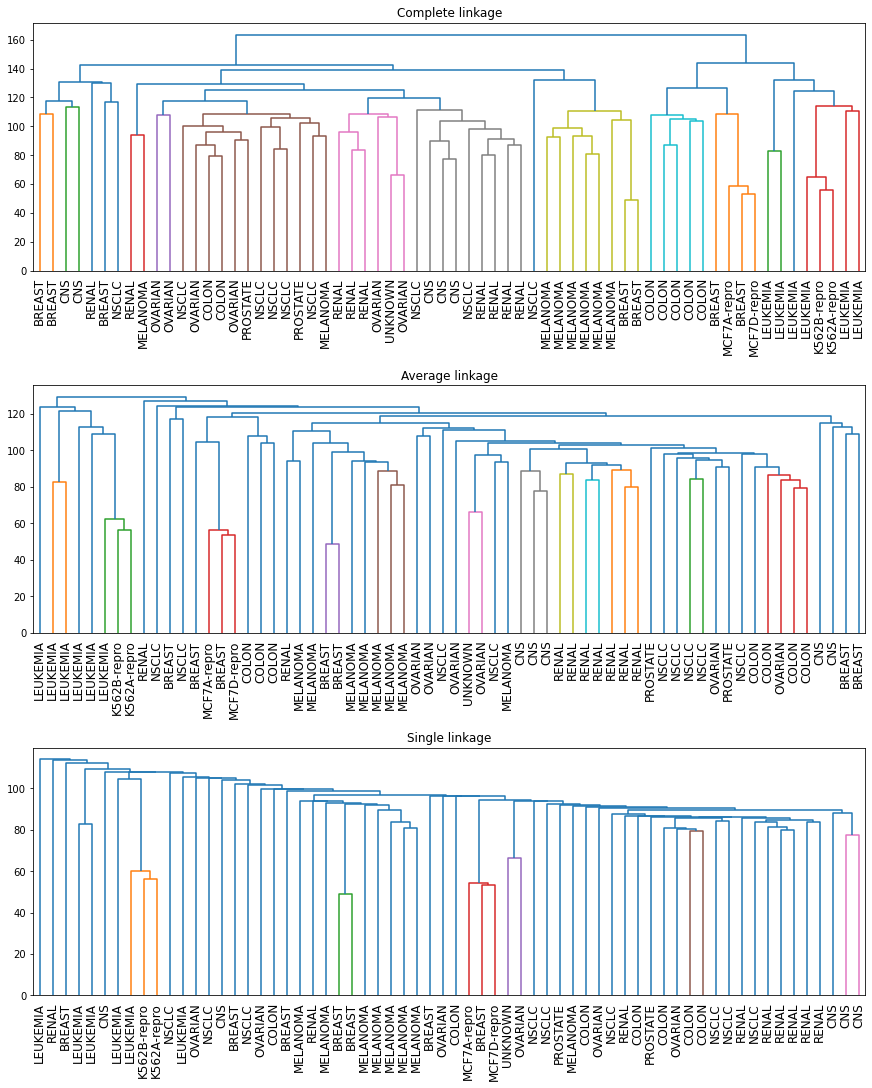

In [56]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), constrained_layout=True)

plot_dend(hc_complete, axes[0], 'Complete linkage')
plot_dend(hc_average, axes[1], 'Average linkage')
plot_dend(hc_single, axes[2], 'Single linkage')

plt.show()

In [59]:
hc_complete_clusters = cut_tree(hc_complete, n_clusters=4)
nci_labs_fact = pd.factorize(labels)

cm = confusion_matrix(nci_labs_fact[0], hc_complete_clusters)
cm

array([[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [60]:
inds = pd.MultiIndex.from_product([['clusters'], range(4)])
cols = pd.MultiIndex.from_product([['nci.labs'], nci_labs_fact[1]])

pd.DataFrame(cm.T[:4], columns=cols, index=inds)

nci.labs                                                       \
                CNS RENAL BREAST NSCLC UNKNOWN OVARIAN MELANOMA PROSTATE   
clusters 0        3     8      2     8       1       6        8        2   
         1        2     1      3     1       0       0        0        0   
         2        0     0      0     0       0       0        0        0   
         3        0     0      2     0       0       0        0        0   

                                                                           
           LEUKEMIA K562B-repro K562A-repro COLON MCF7A-repro MCF7D-repro  
clusters 0        0           0           0     2           0           0  
         1        0           0           0     0           0           0  
         2        6           1           1     0           0           0  
         3        0           0           0     5           1           1

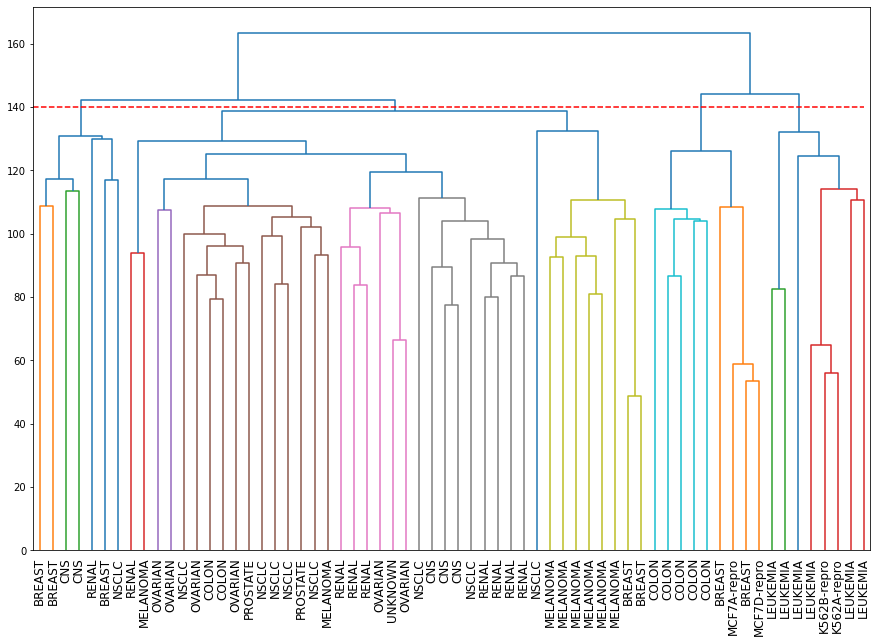

In [61]:
plt.figure(figsize=(15, 10))

dendrogram(hc_complete, leaf_font_size=12, labels=labels)
plt.hlines(140, 0, plt.gca().xaxis.get_data_interval()[1], color='red', ls='--')

plt.show()

In [62]:
np.random.seed(1)

km = KMeans(n_clusters=4, n_init=20)
km.fit(nci_data_scale)

KMeans(n_clusters=4, n_init=20)

In [63]:
cm = confusion_matrix(km.labels_, hc_complete_clusters)
cm

array([[ 0,  0,  6,  0],
       [ 9,  0,  0,  0],
       [19,  7,  0,  0],
       [12,  0,  2,  9]], dtype=int64)

In [64]:
inds = pd.MultiIndex.from_product([['km_clusters'], range(4)])
cols = pd.MultiIndex.from_product([['hc_complete_clusters'], range(4)])

pd.DataFrame(cm, columns=cols, index=inds)

hc_complete_clusters         
                                 0  1  2  3
km_clusters 0                    0  0  6  0
            1                    9  0  0  0
            2                   19  7  0  0
            3                   12  0  2  9

In [65]:
dist5 = pdist(pc.iloc[:, :5])
hc_complete5 = linkage(dist5, method='complete')

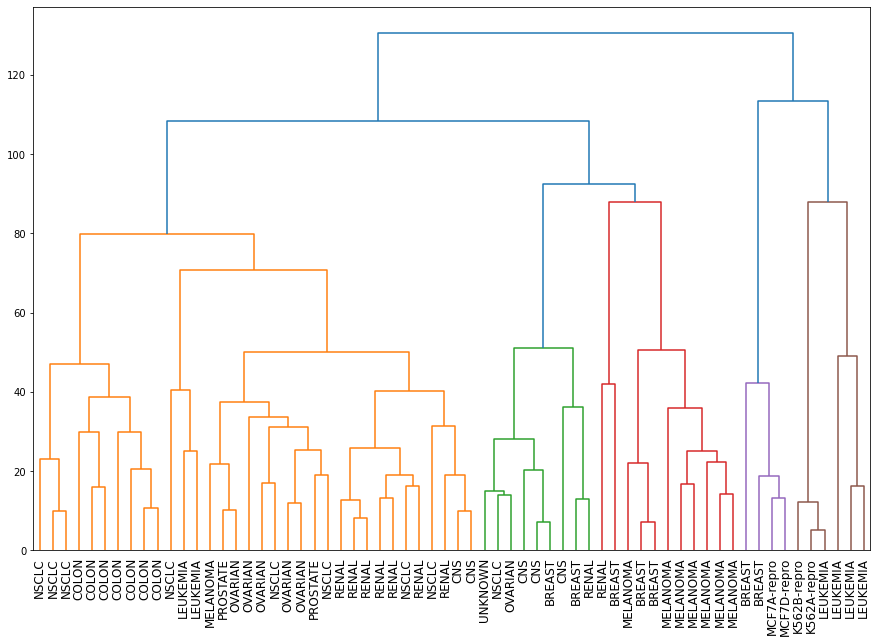

In [66]:
plt.figure(figsize=(15, 10))

dendrogram(hc_complete5, leaf_font_size=12, labels=labels)

plt.show()

In [67]:
hc_complete_pc_cut = cut_tree(hc_complete5, n_clusters=4)
cm = confusion_matrix(nci_labs_fact[0], hc_complete_pc_cut)

In [68]:
inds = pd.MultiIndex.from_product([['clusters'], range(4)])
cols = pd.MultiIndex.from_product([['nci.labs'], nci_labs_fact[1]])

pd.DataFrame(cm.T[:4], columns=cols, index=inds)

nci.labs                                                       \
                CNS RENAL BREAST NSCLC UNKNOWN OVARIAN MELANOMA PROSTATE   
clusters 0        2     7      0     8       0       5        1        2   
         1        3     2      5     1       1       1        7        0   
         2        0     0      0     0       0       0        0        0   
         3        0     0      2     0       0       0        0        0   

                                                                           
           LEUKEMIA K562B-repro K562A-repro COLON MCF7A-repro MCF7D-repro  
clusters 0        2           0           0     7           0           0  
         1        0           0           0     0           0           0  
         2        4           1           1     0           0           0  
         3        0           0           0     0           1           1